<a href="https://colab.research.google.com/github/CristhiamGonzalez/IA/blob/main/TareaBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Importamos las librerias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Importamos el dataset
data = pd.read_csv("Iris.csv")
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [37]:
#Comprobamos
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [38]:
len(x)

150

In [39]:
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [40]:
len(y)

150

In [41]:
#Encoding the categorical dependent variable
from sklearn.preprocessing import LabelEncoder
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)

In [42]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
len(y)

150

In [44]:
#Splitting the train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [45]:
print(x_train)

[[4.5 2.3 1.3 0.3]
 [7.9 3.8 6.4 2. ]
 [5.9 3.2 4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.2 2.8 4.8 1.8]
 [6.5 2.8 4.6 1.5]
 [6.  3.4 4.5 1.6]
 [5.8 2.8 5.1 2.4]
 [4.4 3.  1.3 0.2]
 [5.8 2.7 5.1 1.9]
 [5.9 3.  5.1 1.8]
 [6.3 3.4 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [6.2 2.9 4.3 1.3]
 [6.9 3.1 5.1 2.3]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.3 3.  1.1 0.1]
 [6.2 2.2 4.5 1.5]
 [4.8 3.4 1.6 0.2]
 [6.9 3.1 4.9 1.5]
 [5.  3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [7.7 2.6 6.9 2.3]
 [5.7 2.8 4.5 1.3]
 [5.8 2.7 4.1 1. ]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [7.7 3.  6.1 2.3]
 [4.7 3.2 1.6 0.2]
 [5.4 3.7 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [4.7 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [5.7 2.9 4.2 1.3]
 [5.5 2.5 4.  1.3]
 [5.2 3.5 1.5 0.2]
 [6.7 2.5 5.8 1.8]
 [6.4 3.2 4.5 1.5]
 [4.9 3.  1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [4.9 2.5 4.5 1.7]
 [6.7 3.1 4.7 1.5]
 [4.9 3.1 1.5 0.1]
 [6.5 3.  5.8 2.2]
 [5.  2.3 3.3 1. ]
 [6.1 2.6 5.6 1.4]
 [5.  3.5 1.6 0.6]
 [6.4 2.7 5.3 1.9]
 [5.1 3.4 1.5 0.2]
 [4.6 3.2 1.4 0.2]
 [6.  2.9 4.5 1.5]
 [6.5 3.  5.

In [46]:
len(x_train)

120

In [47]:
print(x_test)

[[5.8 2.6 4.  1.2]
 [5.1 3.8 1.9 0.4]
 [5.  3.4 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [5.7 3.  4.2 1.2]
 [6.6 3.  4.4 1.4]
 [5.4 3.4 1.7 0.2]
 [5.6 2.8 4.9 2. ]
 [5.  3.4 1.6 0.4]
 [5.1 3.8 1.5 0.3]
 [5.5 2.4 3.7 1. ]
 [5.6 3.  4.1 1.3]
 [6.8 3.2 5.9 2.3]
 [7.7 3.8 6.7 2.2]
 [5.1 3.3 1.7 0.5]
 [6.7 3.  5.  1.7]
 [6.  3.  4.8 1.8]
 [6.1 2.8 4.7 1.2]
 [5.8 4.  1.2 0.2]
 [5.8 2.7 5.1 1.9]
 [6.3 2.7 4.9 1.8]
 [6.  2.2 4.  1. ]
 [6.  2.7 5.1 1.6]
 [6.4 2.9 4.3 1.3]
 [4.4 3.2 1.3 0.2]
 [5.  2.  3.5 1. ]
 [5.  3.5 1.3 0.3]
 [4.8 3.  1.4 0.3]
 [6.3 2.3 4.4 1.3]
 [6.7 3.3 5.7 2.1]]


In [48]:
len(x_test)

30

In [49]:
print(y_train)

[0 2 1 0 2 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 2 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 2 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 2 2 1 1 2 2 2
 1 2 1 1 2 2 0 0 1]


In [50]:
len(y_train)

120

In [51]:
print(y_test)

[1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 1 1 0 1 0 0 1 2]


In [52]:
len(y_test)

30

In [53]:
#Para Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(fit_prior=False)

In [54]:
#Para entrenar este clasificador de Bayes
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [55]:
#Para test result
y_pred = mnb.predict(x_test)
print(y_pred)

[1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


In [56]:
y_pred_vertical = y_pred.reshape(len(y_pred),1)
print(y_pred_vertical)

[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]]


In [57]:
y_true_vertical = y_test.reshape(len(y_test),1)
print(y_true_vertical)

[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]]


In [58]:
true_pred = np.concatenate((y_true_vertical, y_pred_vertical), axis = 1)
print(true_pred)

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]]


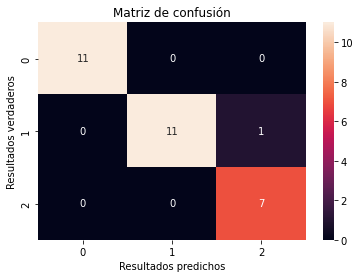

In [59]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot= True)
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")
plt.show()

In [60]:
#Precisión del clasificador de Bayes para este caso
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [62]:
#Hallazgo MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.9508693106633108

In [63]:
#Hallazgo F1
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average= 'weighted'))
print(f1_score(y_test, y_pred, average= 'macro'))
print(f1_score(y_test, y_pred, average= 'micro'))

0.9670531400966184
0.9632850241545894
0.9666666666666667


In [64]:
#Comparar
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [65]:
#Para evaluar este clasificador con nuevos datos
prediction = mnb.predict([[5,3,1.6,0.2]])
print(prediction)

[0]
